In [1]:
import serial
from ECi import ECipot
pot = ECipot()
from ec4py import EC_Data
import matplotlib.pyplot as plt


In [2]:
pot.connect("COM5")




@ ---------------------------------------------------------
@ Initialisation of Potentiostat Shield v1.6
@
@ Library version1.1.2
CELL  0
CELL 0
vGND = 2518mV vs GND
CELL  0
CELL 0
RANGE INDEX: 0
IE  -5
IE -5 - IRange: 10uA
CMODE  1
CMODE 1 - E
@---------------------------------------------------------

@
@---------------------------------------------------------
@ Initialisation of Potentiostat Done
Ini Done
@ ---------------------------------------------------------
@ Time(ms)	E(mV)	i(A)
	6070	-880.00	978.00E-8
	6172	-1623.43	1631.24E-8


Serial<id=0x19c1c02cbe0, open=True>(port='COM5', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=1, xonxoff=False, rtscts=False, dsrdtr=False)

In [3]:
pot.cell_on()

In [4]:
print(pot.cell)

0


In [5]:
pot.cell_off()
pot.reads()

'CELL 1'

In [6]:
#data = line.split("\t")
pot.steps(1000,2000,500,1000)

b'step 1000 2000 500 1000\n'

DATA READ: CELL 0
0 1
CELL 0

DATA READ: STEP 1000 2000 500 1000
1000 2000 500 1000 10
@Step0	S: 1000	t: 2000
@Step1	S: 500	t: 3000
Start Step
Step: 1, SET= 1000
	6475	-2411.32	2408.61E-8
	6577	-2411.63	2409.27E-8
	6678	-2417.10	2414.14E-8
	6780	-2417.97	2415.21E-8
	6881	-2415.97	2413.58E-8
	6983	-2415.40	2412.28E-8
	7084	-2417.04	2413.99E-8
	7185	-2416.11	2413.39E-8
	7287	-2417.69	2415.22E-8
	7388	-2416.84	2414.39E-8
	7490	-2418.94	2416.10E-8
	7591	-2419.67	2416.50E-8
	7692	-2418.39	2415.10E-8
	7794	-2418.65	2416.10E-8
	7895	-2418.07	2415.03E-8
	7997	-2418.39	2415.44E-8
	8098	-2417.46	2414.79E-8
	8199	-2418.20	2415.39E-8
	8300	-2417.34	2415.49E-8
	8401	-2418.74	2416.57E-8
Step: 2, SET= 500
	8503	-2416.27	2413.51E-8
	8604	-2416.37	2413.67E-8
	8705	-2418.69	2416.01E-8
	8806	-2418.86	2416.28E-8
	8907	-2418.53	2415.42E-8
	9008	-2419.73	2416.70E-8
	9110	-2418.47	2415.31E-8
	9211	-2417.85	2415.12E-8
	9313	-2417.46	2414.80E-8
	9414	-2417.39	2414.54E-8
Done Steps

In [7]:
LSV, ini = pot.ramp(500,1000,0,100,2)
LSV, ini = pot.ramp(500,1000,0,100,1)
LSV, ini = pot.ramp(500,1000,0,100,4)

b'ramp 500 1000 0 100 2\n'
INI: xxxxxxxxxxxxxxxxxxxx indexData 20
start
change to pos0: -------------------------------------------------
change to neg1: --------------------------------------------------------------------------------------------

In [ ]:
pot.read()

In [21]:
pot.close()

In [10]:
aa =b'CELL 1 - E\r\n'
print(aa[0:4] == b"CELL")

True


[41114. 41216. 41318. 41419. 41521. 41622. 41723. 41824. 41925. 42028.
 42129. 42230. 42331. 42432. 42533. 42634. 42735. 42838. 42939. 43040.
 43141. 43242. 43343. 43444. 43546. 43648. 43749. 43850. 43951. 44052.
 44154. 44256. 44357. 44459. 44560. 44662. 44763. 44864. 44965. 45066.
 45167. 45268. 45369. 45470. 45571. 45672. 45774. 45875. 45976. 46077.
 46178.]


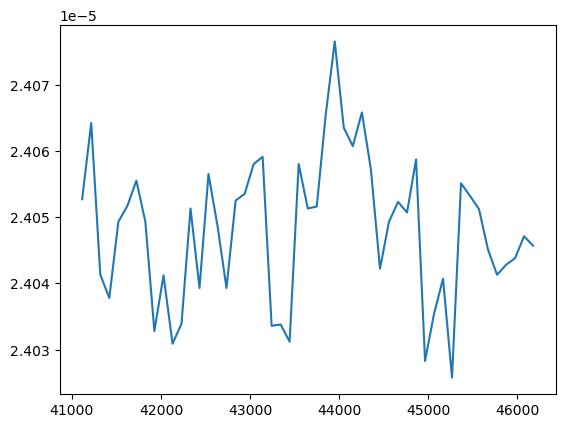

In [11]:
a=LSV[0][:,0]
print(a)
plt.plot(LSV[0][:,0], LSV[0][:,2])
plt.show()

In [12]:
ab = EC_Data()
ab.Time= LSV[0][:,0]
ab.E= LSV[0][:,1]
ab.i= LSV[0][:,2]

In [13]:
ab.plot(x_channel="E",y_channel="i")

TypeError: 'NoneType' object is not subscriptable